In [1]:
import polars as pl
from io import StringIO
import requests
import s3fs
import hvplot.polars

def download_files(table_name: str) -> pl.DataFrame:
    url = f"https://bit.ift.org.mx/descargas/datos/tabs/{table_name}.csv"
    try:
        response = requests.get(url)
        response.raise_for_status()
        
    except requests.exceptions.RequestException as e:
        print(f"Error inesperado: {e}")
    
    response.encoding = 'utf-8'
    csv_string = StringIO(response.text)
    
    return pl.read_csv(csv_string,infer_schema_length=10000)
    
def tweak_df(df: pl.DataFrame, columns_transformations: list, schema: dict) -> pl.DataFrame:
  # aplicación de funciones para el df
  # acepta lista de expresiones
  return df.with_columns(columns_transformations).cast(schema)

def dict_to_df(dict):
    return pl.from_dict(dict)

def upload_df(df: pl.DataFrame, bucket_name: str, file_name: str):
    fs = s3fs.S3FileSystem()
    destination = f"s3://{bucket_name}/{file_name}.parquet"
    try:
        with fs.open(destination, mode = 'wb') as f:
            df.write_parquet(f)
    except Exception as e:
        print(f"Error inesperado: {e}")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/jafet-dev/miniconda3/envs/ift-env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/jafet-dev/miniconda3/envs/ift-env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/jafet-dev/miniconda3/envs/ift-env/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/jafet-dev/miniconda3/envs/ift-env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/jafet-dev/miniconda3/envs/ift-env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/jafet-dev/miniconda3/envs/ift-env/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [25]:
diccionario_datos = {
    "TD_LINEAS_INTMOVIL_ITE_VA":{
        "schema":{
            "FECHA": pl.Date,
            "ANIO": pl.Int16,
            "MES": pl.Int8,
            # "K_GRUPO": pl.Categorical,
            #"GRUPO": pl.Categorical,
            #"K_EMPRESA": pl.Categorical,
            #"EMPRESA": pl.Categorical,
            #"CONCESIONARIO": pl.Categorical,
            "L_PREPAGO_E": pl.Int32,
            "L_POSPAGO_E": pl.Int32,
            "L_POSPAGOC_E": pl.Int32,
            "L_POSPAGOL_E": pl.Int32,
            "L_NO_ESPECIFICADO_E": pl.Int64,
            "L_TOTAL_E": pl.Int32,
            #"FOLIO": pl.Categorical
          },
         "tweak_columns":[
            #pl.col( "L_PREPAGO_E" ).str.replace_all(",","").str.to_integer(base=10),
            #pl.col( "L_POSPAGO_E" ).str.replace_all(",","").str.to_integer(base=10),
            #pl.col( "L_POSPAGOC_E" ).str.replace_all(",","").str.to_integer(base=10),
            #pl.col( "L_POSPAGOL_E" ).str.replace_all(",","").str.to_integer(base=10),
            #pl.col( "L_NO_ESPECIFICADO_E" ).str.replace_all(",","").str.to_integer(base=10),
            #pl.col( "L_TOTAL_E" ).str.replace_all(",","").str.to_integer(base=10),
            pl.col("FECHA").str.to_date("%d/%m/%Y"),
            pl.col("FOLIO").cast(pl.Int32)
          ]
    },
    "TD_TRAF_INTMOVIL_ITE_VA":{
        "schema":{
            "ANIO":pl.Int16,
            "MES":pl.Int8,
            "FECHA":pl.Date,
            #"FOLIO":pl.Categorical,
            ## "K_GRUPO":pl.Categorical,
            #"GRUPO":pl.Categorical,
            #"K_EMPRESA":pl.Categorical,
            #"EMPRESA":pl.Categorical,
            #"CONCESIONARIO":pl.Categorical,
            "TRAF_TB_2G_E":pl.Float32,
            "TRAF_TB_3G_E":pl.Float32,
            "TRAF_TB_4G_E":pl.Float32,
            "TRAF_TB_NO_ESPECIFICADO_E":pl.Float32,
            "TOTAL_TB_E":pl.Float32
        },
        "tweak_columns":[
            #pl.col('TRAF_TB_2G_E').cast(pl.Float32),
            #pl.col('TRAF_TB_3G_E').str.replace_all(",","").cast(pl.Float32),
            #pl.col('TRAF_TB_4G_E').str.replace_all(",","").cast(pl.Float32),
            #pl.col('TRAF_TB_NO_ESPECIFICADO_E').str.replace_all(",","").cast(pl.Float32),
            #pl.col('TOTAL_TB_E').str.replace_all(",","").cast(pl.Float32),
            pl.col('FOLIO').cast(pl.Int32),
            pl.col("FECHA").str.to_date("%d/%m/%Y")
            #pl.coalesce(pl.col('FECHA').str.to_date(format="%d%b%Y",strict=False),pl.col('FECHA').str.to_date(format="%d-%b-%y",strict=False))
            ]
    },
    "TD_IHH_INTMOVIL_ITE_VA":{
        "schema":{
            "ANIO":pl.Int16,
            "MES":pl.Int8,
            "IHH_INTMOVIL_E":pl.Int16
        },
        "tweak_columns": [
            pl.col('IHH_INTMOVIL_E').str.replace_all(",",""),
            pl.col("FECHA").str.to_date("%d/%m/%Y")
        ]
    },
    "TD_MARKET_SHARE_INTMOVIL_ITE_VA":{
        "schema": {
            "ANIO":pl.Int16,
            "MES":pl.Int8,
            # "K_GRUPO":pl.Categorical,
            #"GRUPO":pl.Categorical
        },
        "tweak_columns":[
            pl.col('MARKET_SHARE').str.replace_all("%","").cast(pl.Float32),
            pl.col('FECHA').str.to_date(format="%d/%m/%Y")
        ]

    }
}

In [10]:
diccionario_datos.keys()

dict_keys(['TD_LINEAS_INTMOVIL_ITE_VA', 'TD_TRAF_INTMOVIL_ITE_VA', 'TD_IHH_INTMOVIL_ITE_VA', 'TD_MARKET_SHARE_INTMOVIL_ITE_VA'])

In [26]:
def tablas(name_tabla):
    name = name_tabla
    tabla= download_files(name)
    tabla_tw = tweak_df(tabla,diccionario_datos[name]['tweak_columns'],diccionario_datos[name]['schema'])
    return tabla_tw

In [27]:
lineas = tablas('TD_LINEAS_INTMOVIL_ITE_VA')
traf = tablas('TD_TRAF_INTMOVIL_ITE_VA')
ihh = tablas('TD_IHH_INTMOVIL_ITE_VA')
market_share = tablas('TD_MARKET_SHARE_INTMOVIL_ITE_VA')

In [22]:
print(f'unique values of lineas: {len(lineas["K_GRUPO"].value_counts())}')
print(f'unique values of traf: {len(traf["K_GRUPO"].value_counts())}')
print(f'unique values of participacion_mercado: {len(market_share["K_GRUPO"].value_counts())}')
print(f'unique values of ihh: {len(market_share["K_GRUPO"].value_counts())}')

unique values of lineas: 61
unique values of traf: 30
unique values of participacion_mercado: 61
unique values of ihh: 61


Ok vamos a utilizar la variable K_GRUPO como la variable llave

In [23]:
market_share

ANIO,MES,FECHA,K_GRUPO,GRUPO,MARKET_SHARE,
i16,i8,date,str,str,f32,str
2010,6,2010-06-15,"""G005""","""IUSACELL-UNEF�N""",5.01,null
2010,6,2010-06-15,"""G003""","""TELEF�NICA""",6.28,null
2010,6,2010-06-15,"""G006""","""AM�RICA M�VIL""",88.709999,null
2010,9,2010-09-15,"""G003""","""TELEF�NICA""",6.47,null
2010,9,2010-09-15,"""G006""","""AM�RICA M�VIL""",86.550003,null
…,…,…,…,…,…,…
2023,12,2023-12-15,"""C709""",""" FREEDOM """,1.72,null
2023,12,2023-12-15,"""G003""",""" TELEF�NICA """,7.65,null
2023,12,2023-12-15,"""C804""",""" GRUPO WALMART """,9.46,null


In [5]:
#vemos el market share
first_plot = market_share.select('FECHA','K_GRUPO','MARKET_SHARE').filter(pl.col('MARKET_SHARE')>=1.0).hvplot(x = 'FECHA',y = 'MARKET_SHARE',by = 'K_GRUPO')
first_plot

:NdOverlay   [K_GRUPO]
   :Curve   [FECHA]   (MARKET_SHARE)

In [41]:
maket_share_filtered_top8 = market_share.select('FECHA','K_GRUPO','MARKET_SHARE').filter(pl.col('MARKET_SHARE')>=1.0)

In [32]:
#tomamos el nombre de los grupos de market_share
grupos_market_share_filtered = market_share.filter(pl.col('MARKET_SHARE')>=1.0).select('K_GRUPO','GRUPO').unique()
grupos_market_share_filtered

K_GRUPO,GRUPO
str,str
"""C804""","""GRUPO WALMART"""
"""C629""","""VIRGIN MOBILE"""
"""C709""","""FREEDOMPOP"""
"""G003""","""TELEF�NICA"""
"""G003""",""" TELEF�NICA """
…,…
"""C804""",""" GRUPO WALMART """
"""G006""","""AM�RICA M�VIL"""
"""G005""","""IUSACELL-UNEF�N"""


In [31]:
#vamos a tomar cuanto market share tiene independiente de los años
tot_market_share = market_share.filter(pl.col('MARKET_SHARE')>=1.0).group_by('K_GRUPO').agg(pl.col('MARKET_SHARE').sum())
tot_market_share

K_GRUPO,MARKET_SHARE
str,f32
"""G007""",1526.109985
"""G003""",1585.510376
"""G006""",10032.18457
"""C804""",108.260002
"""C400""",108.150002
"""C709""",50.620007
"""C629""",21.539999
"""G005""",294.309967


In [22]:
second_plot = tot_market_share.hvplot.bar(x = 'K_GRUPO', y = 'MARKET_SHARE')
second_plot

:Bars   [K_GRUPO]   (MARKET_SHARE)

In [26]:
# por historia nos vamos a quedar con g-003
grupos_market_share_filtered.filter(pl.col('K_GRUPO')=='G003')

K_GRUPO,GRUPO
str,str
"""G003""","""TELEF�NICA"""
"""G003""",""" TELEF�NICA """


In [16]:
#vamos a investigar si este grupo se encuentra en las demas tablas 
# tabla ihh no tiene la variable K_GRUPÖ
print(f'G003 aparece: {len(lineas.filter(pl.col('K_GRUPO') == 'G003'))} veces en la tabla lineas')
print(f'G003 aparece: {len(traf.filter(pl.col('K_GRUPO') == 'G003'))} veces en la tabla traf')
#print(f'G003 aparece: {len(ihh.filter(pl.col('K_GRUPO') == 'G003'))} veces en la tabla ihh')
 

G003 aparece: 127 veces en la tabla lineas
G003 aparece: 108 veces en la tabla traf


In [17]:
lineas.head()

FOLIO,FECHA,ANIO,MES,K_GRUPO,GRUPO,K_EMPRESA,EMPRESA,CONCESIONARIO,L_PREPAGO_E,L_POSPAGO_E,L_POSPAGOC_E,L_POSPAGOL_E,L_NO_ESPECIFICADO_E,L_TOTAL_E
i32,date,i16,i8,str,str,str,str,str,i32,i32,i32,i32,i64,i32
100418,2019-01-15,2019,1,"""G008""","""MEGACABLE-MCM""","""C0378""","""MEGACABLE""","""MEGA CABLE, S.A. DE C.V.""",2962,null,null,null,null,2962
100418,2019-02-15,2019,2,"""G008""","""MEGACABLE-MCM""","""C0378""","""MEGACABLE""","""MEGA CABLE, S.A. DE C.V.""",25469,null,null,null,null,25469
100418,2019-03-15,2019,3,"""G008""","""MEGACABLE-MCM""","""C0378""","""MEGACABLE""","""MEGA CABLE, S.A. DE C.V.""",21501,null,null,null,null,21501
100418,2019-04-15,2019,4,"""G008""","""MEGACABLE-MCM""","""C0378""","""MEGACABLE""","""MEGA CABLE, S.A. DE C.V.""",12020,null,null,null,null,12020
100418,2019-05-15,2019,5,"""G008""","""MEGACABLE-MCM""","""C0378""","""MEGACABLE""","""MEGA CABLE, S.A. DE C.V.""",12020,null,null,null,null,12020


In [34]:
lineas_filtered = lineas.select('FECHA','K_GRUPO','GRUPO','K_EMPRESA','EMPRESA','CONCESIONARIO','L_PREPAGO_E','L_POSPAGO_E','L_POSPAGOC_E','L_POSPAGOL_E','L_NO_ESPECIFICADO_E','L_TOTAL_E')

In [21]:
traf.head()

FOLIO,ANIO,MES,FECHA,K_GRUPO,GRUPO,K_EMPRESA,EMPRESA,CONCESIONARIO,TRAF_TB_2G_E,TRAF_TB_3G_E,TRAF_TB_4G_E,TRAF_TB_NO_ESPECIFICADO_E,TOTAL_TB_E
i32,i16,i8,date,str,str,str,str,str,f32,f32,f32,f32,f32
100418,2019,1,2019-01-15,"""G008""","""MEGACABLE-MCM""","""C0378""","""MEGACABLE""","""MEGA CABLE, S.A. DE C.V.""",null,null,null,0.989,0.989
100418,2019,2,2019-02-15,"""G008""","""MEGACABLE-MCM""","""C0378""","""MEGACABLE""","""MEGA CABLE, S.A. DE C.V.""",null,null,null,10.688,10.688
100418,2019,3,2019-03-15,"""G008""","""MEGACABLE-MCM""","""C0378""","""MEGACABLE""","""MEGA CABLE, S.A. DE C.V.""",null,null,null,10.248,10.248
100418,2019,4,2019-04-15,"""G008""","""MEGACABLE-MCM""","""C0378""","""MEGACABLE""","""MEGA CABLE, S.A. DE C.V.""",null,null,null,48.497002,48.497002
100418,2019,5,2019-05-15,"""G008""","""MEGACABLE-MCM""","""C0378""","""MEGACABLE""","""MEGA CABLE, S.A. DE C.V.""",null,null,null,26.489,26.489


In [35]:
traf_filtered = traf.select('FECHA','K_GRUPO','GRUPO','K_EMPRESA','EMPRESA','CONCESIONARIO','TRAF_TB_2G_E','TRAF_TB_3G_E','TRAF_TB_4G_E','TRAF_TB_NO_ESPECIFICADO_E','TOTAL_TB_E')

In [38]:
lineas_filtered_with_top8 = lineas_filtered.filter(pl.col('K_GRUPO').is_in(tot_market_share.select('K_GRUPO')))

In [36]:
lineas_filtered_with_top8.hvplot.line(x='FECHA',y='L_TOTAL_E',by='K_GRUPO')

NameError: name 'lineas_filtered_with_top8' is not defined

In [40]:
traf_filtered_with_top8 = traf_filtered.filter(pl.col('K_GRUPO').is_in(tot_market_share.select('K_GRUPO')))

In [34]:
traf_filtered_with_top8.hvplot.line(x='FECHA',y='TOTAL_TB_E',by='K_GRUPO')

:NdOverlay   [K_GRUPO]
   :Curve   [FECHA]   (TOTAL_TB_E)

In [35]:
lineas_filtered_with_top8.shape

(620, 12)

In [36]:
traf_filtered_with_top8.shape

(528, 11)

In [42]:
maket_share_filtered_top8.shape

(531, 3)

In [45]:
lineas_filtered_with_top8.select('FECHA').unique().sort('FECHA')

FECHA
date
2013-06-15
2013-07-15
2013-08-15
2013-09-15
2013-10-15
…
2023-08-15
2023-09-15
2023-10-15


In [46]:
traf_filtered_with_top8.select('FECHA').unique().sort('FECHA')

FECHA
date
2015-01-15
2015-02-15
2015-03-15
2015-04-15
2015-05-15
…
2023-08-15
2023-09-15
2023-10-15


In [48]:
maket_share_filtered_top8.select('FECHA').unique().sort('FECHA')

FECHA
date
2010-06-15
2010-09-15
2010-12-15
2011-03-15
2011-06-15
…
2023-08-15
2023-09-15
2023-10-15


In [42]:
first_join = maket_share_filtered_top8.join(traf_filtered_with_top8, on=['FECHA','K_GRUPO'], how='left')
second_join = first_join.join(lineas_filtered_with_top8, on=['FECHA','K_GRUPO'], how='left')

In [43]:
second_join = first_join.join(lineas_filtered_with_top8, on=['FECHA','K_GRUPO'], how='left')

In [44]:
second_join

FECHA,K_GRUPO,MARKET_SHARE,GRUPO,K_EMPRESA,EMPRESA,CONCESIONARIO,TRAF_TB_2G_E,TRAF_TB_3G_E,TRAF_TB_4G_E,TRAF_TB_NO_ESPECIFICADO_E,TOTAL_TB_E,GRUPO_right,K_EMPRESA_right,EMPRESA_right,CONCESIONARIO_right,L_PREPAGO_E,L_POSPAGO_E,L_POSPAGOC_E,L_POSPAGOL_E,L_NO_ESPECIFICADO_E,L_TOTAL_E
date,str,f32,str,str,str,str,f32,f32,f32,f32,f32,str,str,str,str,i32,i32,i32,i32,i64,i32
2010-06-15,"""G005""",5.01,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2010-06-15,"""G003""",6.28,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2010-06-15,"""G006""",88.709999,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2010-09-15,"""G003""",6.47,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2010-09-15,"""G006""",86.550003,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2023-12-15,"""C709""",1.72,"""FREEDOM""","""C0709""","""FREEDOMPOP""","""FREEDOMPOP MEXICO, S.A. DE C.V…",0.0,0.0,0.0,850.452026,850.452026,"""FREEDOM""","""C0709""","""FREEDOMPOP""","""FREEDOMPOP MEXICO, S.A. DE C.V…",null,null,null,null,2173583,2173583
2023-12-15,"""G003""",7.65,"""TELEF�NICA""","""C0422""","""MOVISTAR""","""PEGASO PCS, S.A. DE C.V.""",0.017,1939.131958,57730.652344,0.0,59669.800781,"""TELEF�NICA""","""C0422""","""MOVISTAR""","""PEGASO PCS, S.A. DE C.V.""",8602253,null,1025604,8804,null,9636661
2023-12-15,"""C804""",9.46,"""GRUPO WALMART""","""C0804""","""BODEGA AURRERA INTERNET Y TELE…","""WAL-MART INNOVACION, S. DE R.L…",0.0,0.0,0.0,35220.394531,35220.394531,"""GRUPO WALMART""","""C0804""","""BODEGA AURRERA INTERNET Y TELE…","""WAL-MART INNOVACION, S. DE R.L…",null,null,null,null,11919365,11919365


In [17]:
second_join.select('K_GRUPO').unique()

K_GRUPO
str
"""C629"""
"""C709"""
"""C400"""
"""G003"""
"""C804"""
"""G005"""
"""G006"""
"""G007"""


In [18]:
second_join.shape

(531, 22)

In [21]:
second_join.columns

['FECHA',
 'K_GRUPO',
 'MARKET_SHARE',
 'GRUPO',
 'K_EMPRESA',
 'EMPRESA',
 'CONCESIONARIO',
 'TRAF_TB_2G_E',
 'TRAF_TB_3G_E',
 'TRAF_TB_4G_E',
 'TRAF_TB_NO_ESPECIFICADO_E',
 'TOTAL_TB_E',
 'GRUPO_right',
 'K_EMPRESA_right',
 'EMPRESA_right',
 'CONCESIONARIO_right',
 'L_PREPAGO_E',
 'L_POSPAGO_E',
 'L_POSPAGOC_E',
 'L_POSPAGOL_E',
 'L_NO_ESPECIFICADO_E',
 'L_TOTAL_E']

In [44]:
second_join.hvplot.line(x='FECHA',y='L_NO_ESPECIFICADO_E',by='K_GRUPO')

:NdOverlay   [K_GRUPO]
   :Curve   [FECHA]   (L_NO_ESPECIFICADO_E)

In [42]:
a = hvplot.scatter_matrix(second_join,alpha=0.2)

In [46]:
import seaborn as sns

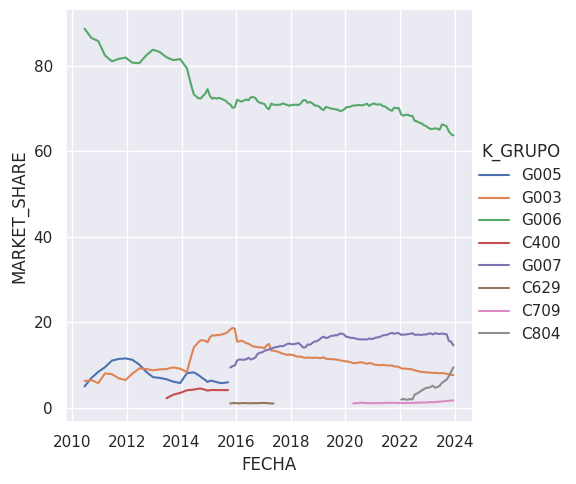

In [47]:
sns.set_theme()
sns.relplot(
    data=second_join, kind='line',
    x='FECHA', y='MARKET_SHARE',
    hue='K_GRUPO'
)

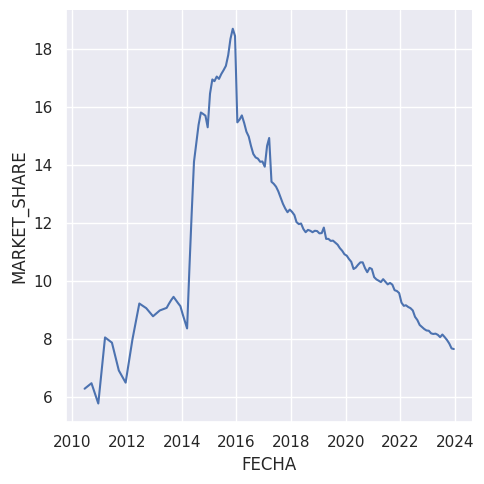

In [50]:
sj_g003 = second_join.filter(pl.col('K_GRUPO')=='G003')
sns.relplot(
    data=sj_g003, kind='line',
    x='FECHA', y='MARKET_SHARE'
)

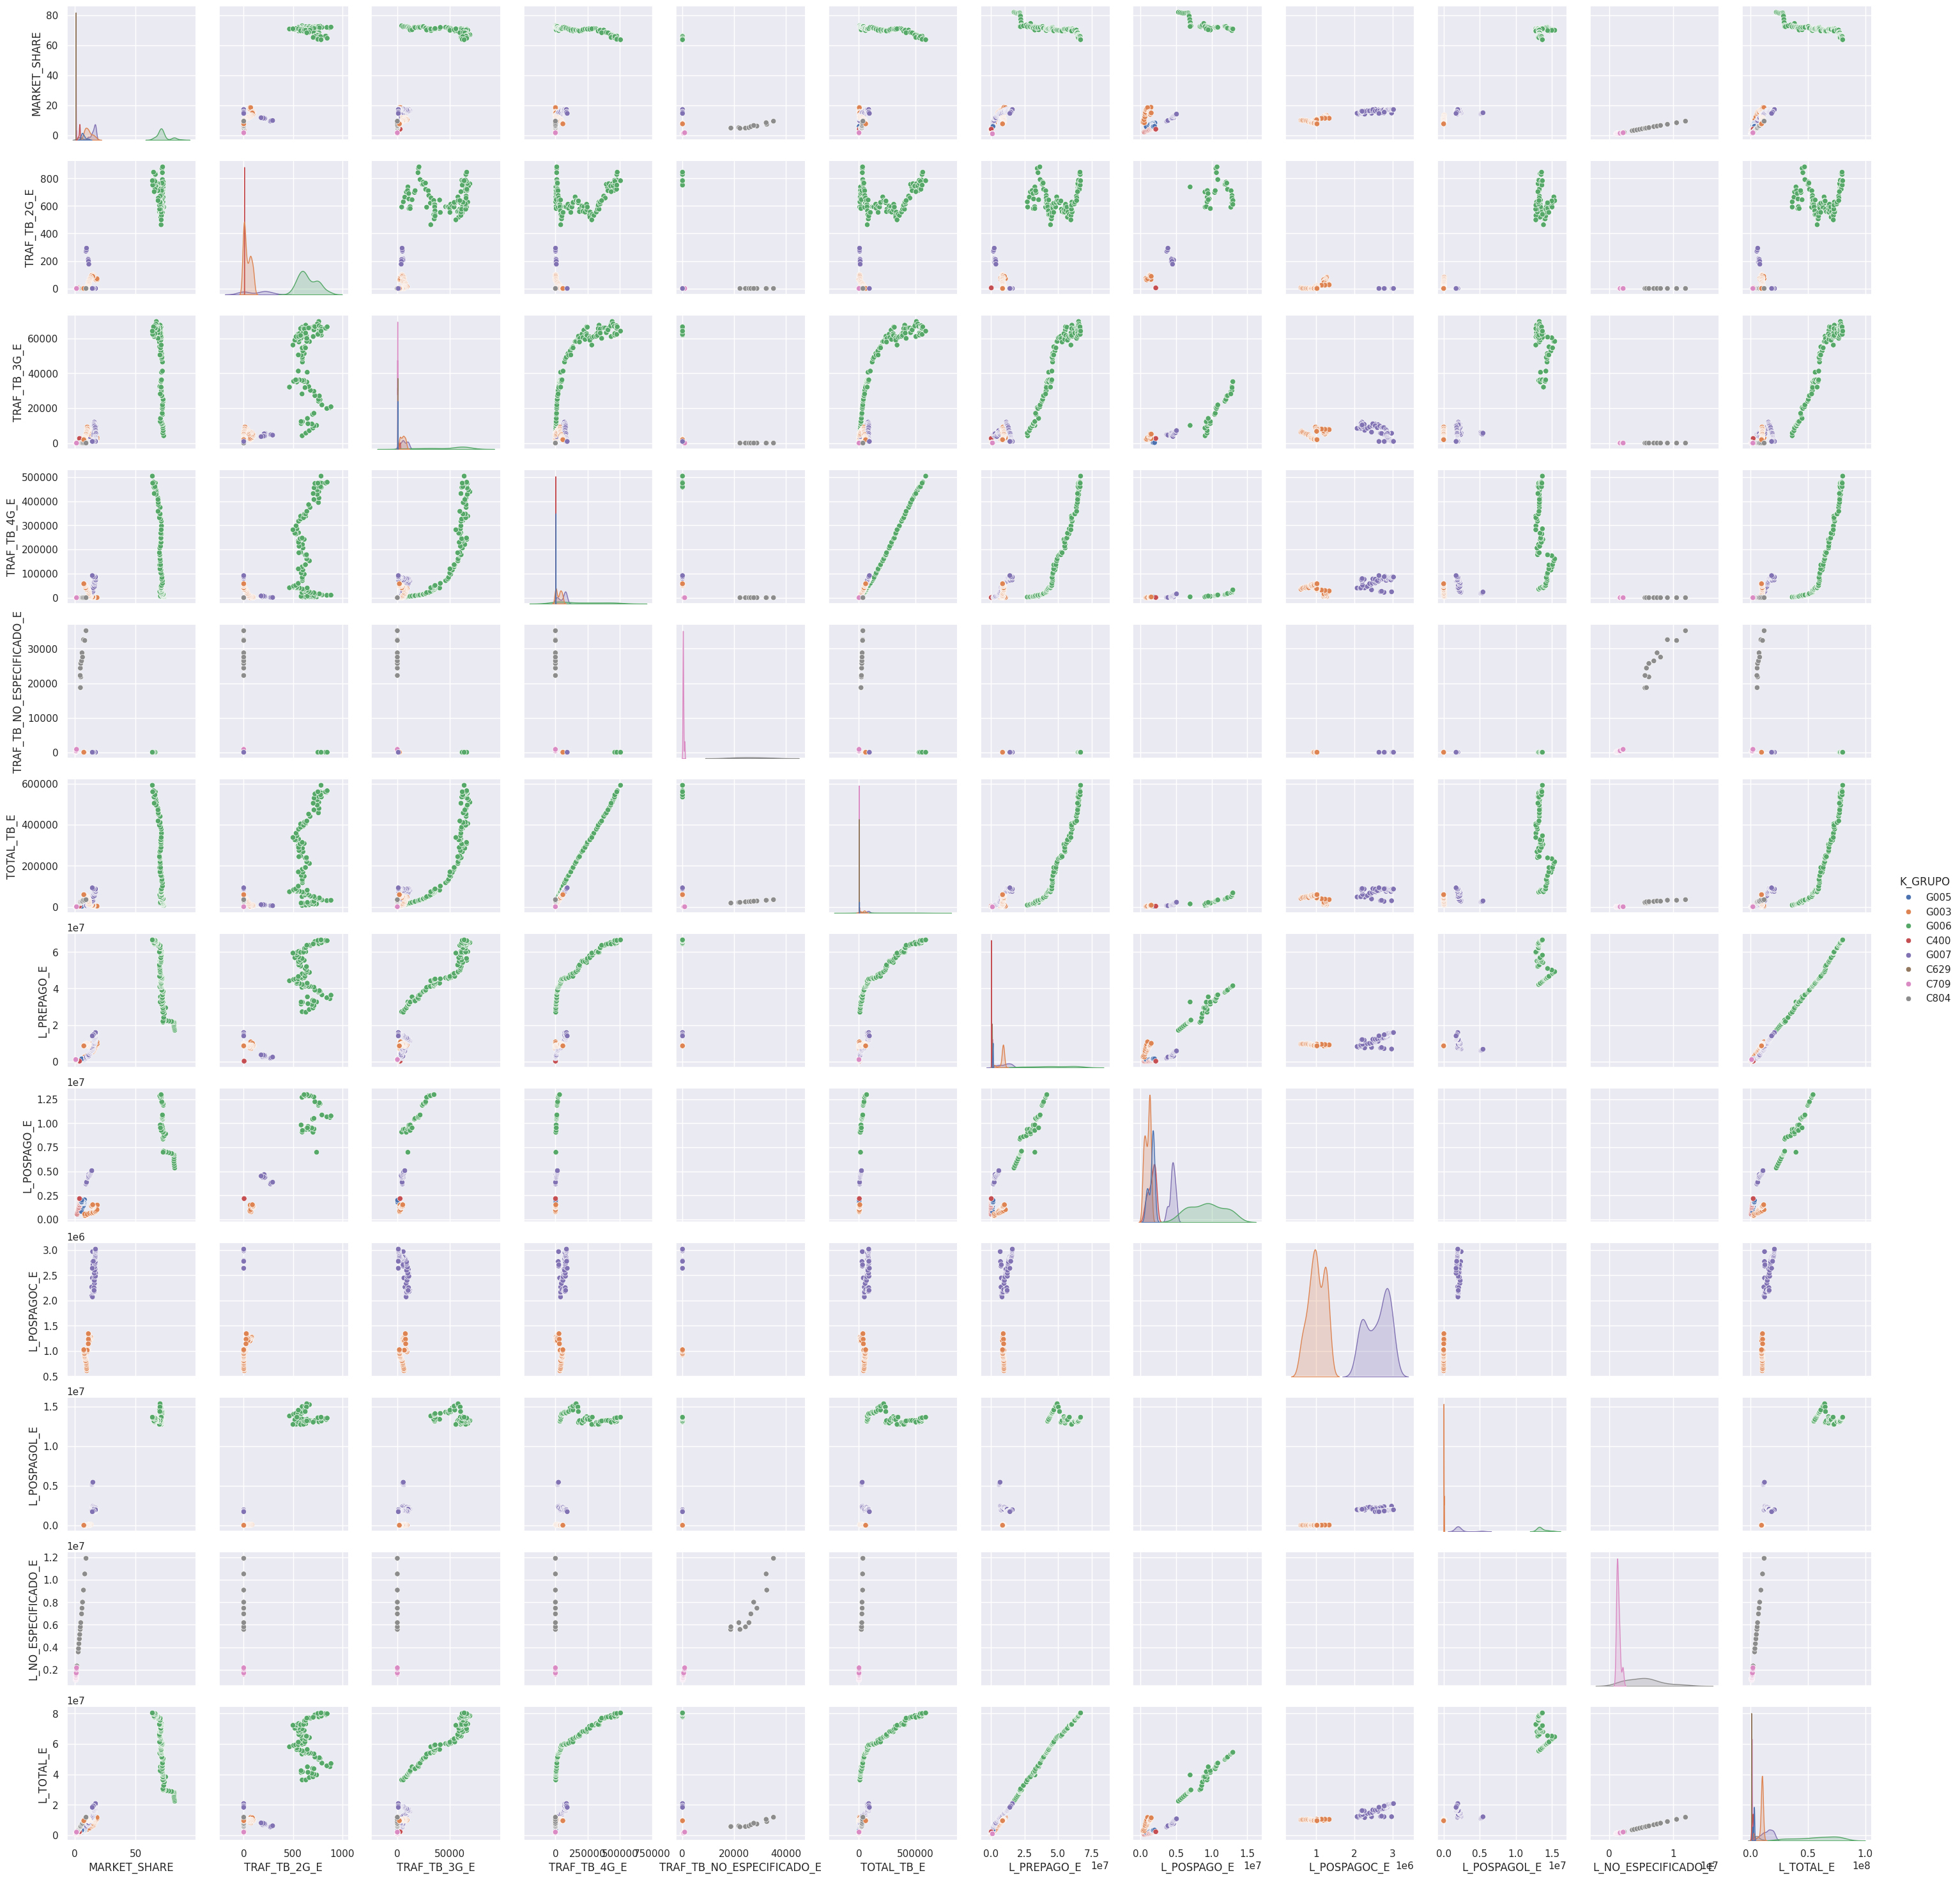

In [49]:
second_join_pandas = second_join.to_pandas()
sns.pairplot(data=second_join_pandas,hue='K_GRUPO')
'''
(G006 se mantiene muy separado de las demas variables)

Market share [L_PREPAGO_E,L_POSPAGO_E,L_POSPAGOC_E,L_POSPAGOL_E,L_NO_ESPECIFICADO_E,L_TOTAL_E] 
TTRAF_TB_2G_E [L_POSPAGO_E,L_POSPAGOC_E,L_POSPAGOL_E,L_NO_ESPECIFICADO_E,L_TOTAL_E]
TRAF_TB_3G_E [TRAF_TB_4G_E,TOTAL_TB_E,L_PREPAGO_E,L_POSPAGO_E,L_POSPAGOC_E,L_POSPAGOL_E,L_NO_ESPECIFICADO_E,L_TOTAL_E]
TRAF_TB_4G_E [TRAF_TB_3G_E,TOTAL_TB_E,L_PREPAGO_E,L_POSPAGO_E,L_POSPAGOC_E,L_TOTAL_E]
TRAF_TB_NO_ESPECIFICADO_E con nada
TOTAL_TB [TRAF_TB_3G_E,TRAF_TB_4G_E,L_PREPAGO_E,L_POSPAGO_E,L_POSPAGOC_E,L_NO_ESPECIFICADO_E,L_TOTAL_E]
L_PREPAGO_E [TRAF_TB_3G,TRAF_TB_4G,TOTAL__TB_E,L_POSPAGO_E,L_POSPAGOC_E,L_POSPAGOL_E,L_TOTAL_E]

'''

In [ ]:
'''
L_POSPAGO_E [MARKET_SHARE, TRAF_TB_2G_E,TRAF_TB_3G_E,L_PREPAGO_E,L_TOTAL_E]
L_POSPAGOL_E [MARKET_SHARE,L_POSPAGOC_E,L_TOTAL]
L_NO_ESPECIFICADO_E [MARKET_SHARE,TRAF_TB_NO_ESPECIFICADO_E,L_TTOAL_E]
L_TOTAL_E
'''

In [50]:
second_join

FECHA,K_GRUPO,MARKET_SHARE,GRUPO,K_EMPRESA,EMPRESA,CONCESIONARIO,TRAF_TB_2G_E,TRAF_TB_3G_E,TRAF_TB_4G_E,TRAF_TB_NO_ESPECIFICADO_E,TOTAL_TB_E,GRUPO_right,K_EMPRESA_right,EMPRESA_right,CONCESIONARIO_right,L_PREPAGO_E,L_POSPAGO_E,L_POSPAGOC_E,L_POSPAGOL_E,L_NO_ESPECIFICADO_E,L_TOTAL_E
date,str,f32,str,str,str,str,f32,f32,f32,f32,f32,str,str,str,str,i32,i32,i32,i32,i64,i32
2010-06-15,"""G005""",5.01,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2010-06-15,"""G003""",6.28,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2010-06-15,"""G006""",88.709999,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2010-09-15,"""G003""",6.47,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2010-09-15,"""G006""",86.550003,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2023-12-15,"""C709""",1.72,"""FREEDOM""","""C0709""","""FREEDOMPOP""","""FREEDOMPOP MEXICO, S.A. DE C.V…",0.0,0.0,0.0,850.452026,850.452026,"""FREEDOM""","""C0709""","""FREEDOMPOP""","""FREEDOMPOP MEXICO, S.A. DE C.V…",null,null,null,null,2173583,2173583
2023-12-15,"""G003""",7.65,"""TELEF�NICA""","""C0422""","""MOVISTAR""","""PEGASO PCS, S.A. DE C.V.""",0.017,1939.131958,57730.652344,0.0,59669.800781,"""TELEF�NICA""","""C0422""","""MOVISTAR""","""PEGASO PCS, S.A. DE C.V.""",8602253,null,1025604,8804,null,9636661
2023-12-15,"""C804""",9.46,"""GRUPO WALMART""","""C0804""","""BODEGA AURRERA INTERNET Y TELE…","""WAL-MART INNOVACION, S. DE R.L…",0.0,0.0,0.0,35220.394531,35220.394531,"""GRUPO WALMART""","""C0804""","""BODEGA AURRERA INTERNET Y TELE…","""WAL-MART INNOVACION, S. DE R.L…",null,null,null,null,11919365,11919365


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.impute import SimpleImputer
import numpy as np

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [108]:
categorical = []
numerical = ['L_NO_ESPECIFICADO_E','L_POSPAGOC_E']

In [112]:
prueba = second_join.select(numerical+categorical).with_columns(pl.col('L_NO_ESPECIFICADO_E').fill_null(0),pl.col('L_POSPAGOC_E').fill_null(0))
train_dicts = prueba.to_dicts()

In [113]:
prueba.describe()

statistic,L_NO_ESPECIFICADO_E,L_POSPAGOC_E
str,f64,f64
"""count""",531.0,531.0
"""null_count""",0.0,0.0
"""mean""",331661.636535,508694.485876
"""std""",1.2864e6,916252.382031
"""min""",0.0,0.0
"""25%""",0.0,0.0
"""50%""",0.0,0.0
"""75%""",0.0,870503.0
"""max""",1.1919365e7,3.01945e6


In [114]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [115]:
target = 'MARKET_SHARE'
y_train = second_join.select(target).to_numpy()

In [116]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = lr.predict(X_train)

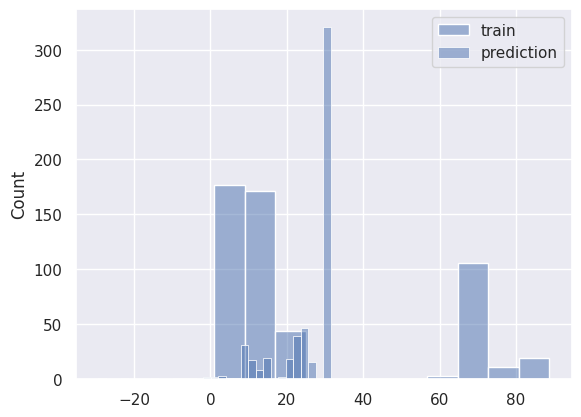

In [118]:
import matplotlib.pyplot as plt
sns.histplot(y_train,label ='train')
sns.histplot(y_pred,label='prediction')
plt.legend()

In [96]:
type(y_train)

numpy.ndarray

In [97]:
type(y_pred)

numpy.ndarray

In [119]:
prueba = pl.from_numpy(y_pred,schema = ['market_share_predicted'])
prueba

market_share_predicted
f64
31.502859
31.502859
31.502859
31.502859
31.502859
…
20.409053
23.519994
-29.332692


In [120]:
total = pl.concat([second_join.select('FECHA','MARKET_SHARE'),prueba],how='horizontal')

In [121]:
uno = total.hvplot.line(x='FECHA',y='MARKET_SHARE')
dos = total.hvplot.line(x='FECHA',y='market_share_predicted')
uno*dos

:Overlay
   .Curve.I  :Curve   [FECHA]   (MARKET_SHARE)
   .Curve.II :Curve   [FECHA]   (market_share_predicted)

In [8]:
def get_tables(file_name):
    fs = s3fs.S3FileSystem() 
    source = f"s3://ift-bucket-jafet/historical/{file_name}.parquet"
    return pl.scan_parquet(source)
    
a = get_tables("TD_IHH_INTMOVIL_ITE_VA")

In [9]:
a.collect()

ANIO,MES,FECHA,IHH_INTMOVIL_E
i64,i64,date,i64
2010,6,2010-06-15,7934
2010,9,2010-09-15,7581
2010,12,2010-12-15,7470
2011,3,2011-03-15,6953
2011,6,2011-06-15,6758
…,…,…,…
2022,12,2022-12-15,4736
2023,3,2023-03-15,4654
2023,6,2023-06-15,4629


In [6]:
a.filter(pl.col('IHH_INTMOVIL_E')<5000).collect()

ANIO,MES,FECHA,IHH_INTMOVIL_E
i64,i64,date,i64
2022,9,2022-09-15,4835
2022,12,2022-12-15,4736
2023,3,2023-03-15,4654
2023,6,2023-06-15,4629
2023,9,2023-09-15,4742
2023,12,2023-12-15,4429


In [22]:
import mlflow

mlflow.set_tracking_uri("http://localhost:5000")


In [23]:
mlflow.sklearn.autolog()

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR

mlflow.sklearn.autolog()

for model_class in (RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, LinearSVR):

    with mlflow.start_run():

        mlflow.log_param("train-data-path", "./data/green_tripdata_2021-01.csv")
        mlflow.log_param("valid-data-path", "./data/green_tripdata_2021-02.csv")
        mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

        mlmodel = model_class()
        mlmodel.fit(X_train, y_train)

        y_pred = mlmodel.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)
        

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow

mlflow.set_tracking_uri("http://localhost:5000")

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

first_join = maket_share_filtered_top8.join(traf_filtered_with_top8, on=['FECHA','K_GRUPO'], how='left')
second_join = first_join.join(lineas_filtered_with_top8, on=['FECHA','K_GRUPO'], how='left')

sj_g003 = second_join.filter(pl.col('K_GRUPO')=='G003')

df = sj_g003.select(numerical+categorical+target).with_columns(pl.col('L_NO_ESPECIFICADO_E').fill_null(0),pl.col('L_POSPAGOC_E').fill_null(0))
categorical = []
numerical = ['L_NO_ESPECIFICADO_E','L_POSPAGOC_E']
target = ['MARKET_SHARE']


with mlflow.start_run():
    #separacion train test 80-20
    train,test = train_test_split(df)
    train,test = train_test_split(df)
    train_dicts = train.select(numerical+categorical).to_dicts()
    test_dicts = test.select(numerical+categorical).to_dicts()
    dv = DictVectorizer()
    X_train = dv.fit_transform(train_dicts)
    X_test = dv.fit_transform(test_dicts)
    y_train = train.select(target).to_numpy()
    y_test = test.select(target).to_numpy()
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    (rmse,mae,r2) = eval_metrics(y_test,y_pred)

2024/08/11 19:37:31 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/08/11 19:37:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Failed to upload /tmp/tmpsptsggew/estimator.html to ift-bucket-jafet/mlflow/0/9009168eb6414b8f87be8423ab2908a6/artifacts/estimator.html: An error occurred (ExpiredToken) when calling the PutObject operation: The provided token has expired.
2024/08/11 19:37:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run youthful-moose-632 at: http://localhost:5000/#/experiments/0/runs/9009168eb6414b8f87be8423ab2908a6.
2024/08/11 19:37:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/0.


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
categorical = []
numerical = ['L_NO_ESPECIFICADO_E','L_POSPAGOC_E']
target = ['MARKET_SHARE']
df = sj_g003.select(numerical+categorical+target).with_columns(pl.col('L_NO_ESPECIFICADO_E').fill_null(0),pl.col('L_POSPAGOC_E').fill_null(0))
train,test = train_test_split(df)
train_dicts = train.select(numerical+categorical).to_dicts()
test_dicts = test.select(numerical+categorical).to_dicts()
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_test = dv.fit_transform(test_dicts)
y_train = train.select(target).to_numpy()
y_test = test.select(target).to_numpy()
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

2024/08/11 19:18:58 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'fbc2bcb6f4284f9891412274b7af781b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/08/11 19:18:58 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/08/11 19:18:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run peaceful-cod-473 at: http://localhost:5000/#/experiments/0/runs/fbc2bcb6f4284f9891412274b7af781b.
2024/08/11 19:18:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/0.
2024/08/11 19:18:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: No module named 'boto3'


In [58]:
train_dicts = train.to_dicts()

In [59]:
train

L_NO_ESPECIFICADO_E,L_POSPAGOC_E
i64,i32
0,1020122
0,0
0,0
0,1019792
0,1332730
…,…
0,0
0,1027964
0,924879


In [61]:
train.select(target).to_numpy

<bound method DataFrame.to_numpy of shape: (104, 1)
┌──────────────┐
│ MARKET_SHARE │
│ ---          │
│ f32          │
╞══════════════╡
│ 9.68         │
│ 9.34         │
│ 11.79        │
│ 8.17         │
│ 11.45        │
│ …            │
│ 13.94        │
│ 15.15        │
│ 18.35        │
│ 12.5         │
│ 10.46        │
└──────────────┘>

In [62]:
type(train)

polars.dataframe.frame.DataFrame

In [67]:
type(train.select('MARKET_SHARE').to_numpy())

numpy.ndarray